In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sb

%matplotlib inline

In [2]:
address = 'drinksbycountry.csv'
drinks = pd.read_csv(address, encoding = 'utf-8')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [6]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [7]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [8]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [10]:
drinks_test = drinks[['continent', 'country', 'beer_servings', 'wine_servings']]

In [12]:
drinks_grp = drinks_test.groupby(['continent', 'country'], as_index = False).mean()
drinks_grp

,continent,country,beer_servings,wine_servings
0,Africa,Algeria,25,14
1,Africa,Angola,217,45
2,Africa,Benin,34,13
3,Africa,Botswana,173,35
4,Africa,Burkina Faso,25,7
5,Africa,Burundi,88,0
6,Africa,Cabo Verde,144,16
7,Africa,Cameroon,147,4
8,Africa,Central African Republic,17,1
9,Africa,Chad,15,1


In [14]:
drinks_grp = drinks_test.groupby(['continent', 'country']).mean().sort_values(['beer_servings'], ascending = False)
drinks_grp

beer_servings  wine_servings
continent     country                                         
Africa        Namibia                       376              1
Europe        Czech Republic                361            134
Africa        Gabon                         347             59
Europe        Germany                       346            175
              Lithuania                     343             56
              Poland                        343             56
South America Venezuela                     333              3
Europe        Ireland                       313            165
Oceania       Palau                         306             23
Europe        Romania                       297            167
              Belgium                       295            212
North America Panama                        285             18
Europe        Spain                         284            112
              Serbia                        283            127
              Latvia                        281             62
              Austria                       279            191
              Slovenia                      270            276
North America Belize                        263              8
Europe        Finland                       263             97
Oceania       Australia                     261            212
Europe        Netherlands                   251            190
North America USA                           249             84
Asia          Russian Federation            247             73
Europe        Andorra                       245            312
South America Brazil                        245             16
North America Canada                        240            100
              Mexico                        238              5
Europe        Luxembourg                    236            271
              Hungary                       234            185
              Iceland                       233             78
...                                         ...            ...
Africa        Egypt                           6              1
Asia          Jordan                          6              1
Oceania       Tuvalu                          6              9
Asia          Yemen                           6              0
              Indonesia                       5              0
              Myanmar                         5              0
              Nepal                           5              0
              Syria                           5             16
Africa        Mali                            5              1
              Niger                           3              1
Asia          Tajikistan                      2              0
North America Haiti                           1              1
Africa        Comoros                         1              1
Asia          Qatar                           1              7
              Timor-Leste                     1              4
Europe        San Marino                      0              0
Africa        Libya                           0              0
              Mauritania                      0              0
              Somalia                         0              0
Oceania       Marshall Islands                0              0
              Cook Islands                    0             74
Asia          Afghanistan                     0              0
Europe        Monaco                          0              0
Asia          Iran                            0              0
              Kuwait                          0              0
              Maldives                        0              0
              North Korea                     0              0
              Pakistan                        0              0
              Saudi Arabia                    0              0
              Bangladesh                      0              0

[193 rows x 2 columns]

In [15]:
drinks_grp = drinks_test.groupby(['continent', 'country'], as_index = False).mean()
drinks_grp

,continent,country,beer_servings,wine_servings
0,Africa,Algeria,25,14
1,Africa,Angola,217,45
2,Africa,Benin,34,13
3,Africa,Botswana,173,35
4,Africa,Burkina Faso,25,7
5,Africa,Burundi,88,0
6,Africa,Cabo Verde,144,16
7,Africa,Cameroon,147,4
8,Africa,Central African Republic,17,1
9,Africa,Chad,15,1


###### https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html

# https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

In [19]:
drinks_pivot = drinks_grp.pivot(index = 'continent', columns = 'country')
drinks_pivot

beer_servings                                                   \
country         Afghanistan Albania Algeria Andorra Angola Antigua & Barbuda   
continent                                                                      
Africa                  NaN     NaN    25.0     NaN  217.0               NaN   
Asia                    0.0     NaN     NaN     NaN    NaN               NaN   
Europe                  NaN    89.0     NaN   245.0    NaN               NaN   
North America           NaN     NaN     NaN     NaN    NaN             102.0   
Oceania                 NaN     NaN     NaN     NaN    NaN               NaN   
South America           NaN     NaN     NaN     NaN    NaN               NaN   

                                                   ...        wine_servings  \
country       Argentina Armenia Australia Austria  ... United Arab Emirates   
continent                                          ...                        
Africa              NaN     NaN       NaN     NaN  ...                  NaN   
Asia                NaN     NaN       NaN     NaN  ...                  5.0   
Europe              NaN    21.0       NaN   279.0  ...                  NaN   
North America       NaN     NaN       NaN     NaN  ...                  NaN   
Oceania             NaN     NaN     261.0     NaN  ...                  NaN   
South America     193.0     NaN       NaN     NaN  ...                  NaN   

                                                                           \
country       United Kingdom Uruguay Uzbekistan Vanuatu Venezuela Vietnam   
continent                                                                   
Africa                   NaN     NaN        NaN     NaN       NaN     NaN   
Asia                     NaN     NaN        8.0     NaN       NaN     1.0   
Europe                 195.0     NaN        NaN     NaN       NaN     NaN   
North America            NaN     NaN        NaN     NaN       NaN     NaN   
Oceania                  NaN     NaN        NaN    11.0       NaN     NaN   
South America            NaN   220.0        NaN     NaN       3.0     NaN   

                                     
country       Yemen Zambia Zimbabwe  
continent                            
Africa          NaN    4.0      4.0  
Asia            0.0    NaN      NaN  
Europe          NaN    NaN      NaN  
North America   NaN    NaN      NaN  
Oceania         NaN    NaN      NaN  
South America   NaN    NaN      NaN  

[6 rows x 386 columns]

In [20]:
drinks_pivot = drinks_grp.pivot(index = 'country', columns = 'continent')
drinks_pivot

beer_servings                                      \
continent                   Africa   Asia Europe North America Oceania   
country                                                                  
Afghanistan                    NaN    0.0    NaN           NaN     NaN   
Albania                        NaN    NaN   89.0           NaN     NaN   
Algeria                       25.0    NaN    NaN           NaN     NaN   
Andorra                        NaN    NaN  245.0           NaN     NaN   
Angola                       217.0    NaN    NaN           NaN     NaN   
Antigua & Barbuda              NaN    NaN    NaN         102.0     NaN   
Argentina                      NaN    NaN    NaN           NaN     NaN   
Armenia                        NaN    NaN   21.0           NaN     NaN   
Australia                      NaN    NaN    NaN           NaN   261.0   
Austria                        NaN    NaN  279.0           NaN     NaN   
Azerbaijan                     NaN    NaN   21.0           NaN     NaN   
Bahamas                        NaN    NaN    NaN         122.0     NaN   
Bahrain                        NaN   42.0    NaN           NaN     NaN   
Bangladesh                     NaN    0.0    NaN           NaN     NaN   
Barbados                       NaN    NaN    NaN         143.0     NaN   
Belarus                        NaN    NaN  142.0           NaN     NaN   
Belgium                        NaN    NaN  295.0           NaN     NaN   
Belize                         NaN    NaN    NaN         263.0     NaN   
Benin                         34.0    NaN    NaN           NaN     NaN   
Bhutan                         NaN   23.0    NaN           NaN     NaN   
Bolivia                        NaN    NaN    NaN           NaN     NaN   
Bosnia-Herzegovina             NaN    NaN   76.0           NaN     NaN   
Botswana                     173.0    NaN    NaN           NaN     NaN   
Brazil                         NaN    NaN    NaN           NaN     NaN   
Brunei                         NaN   31.0    NaN           NaN     NaN   
Bulgaria                       NaN    NaN  231.0           NaN     NaN   
Burkina Faso                  25.0    NaN    NaN           NaN     NaN   
Burundi                       88.0    NaN    NaN           NaN     NaN   
Cabo Verde                   144.0    NaN    NaN           NaN     NaN   
Cambodia                       NaN   57.0    NaN           NaN     NaN   
...                            ...    ...    ...           ...     ...   
Sudan                          8.0    NaN    NaN           NaN     NaN   
Suriname                       NaN    NaN    NaN           NaN     NaN   
Swaziland                     90.0    NaN    NaN           NaN     NaN   
Sweden                         NaN    NaN  152.0           NaN     NaN   
Switzerland                    NaN    NaN  185.0           NaN     NaN   
Syria                          NaN    5.0    NaN           NaN     NaN   
Tajikistan                     NaN    2.0    NaN           NaN     NaN   
Tanzania                      36.0    NaN    NaN           NaN     NaN   
Thailand                       NaN   99.0    NaN           NaN     NaN   
Timor-Leste                    NaN    1.0    NaN           NaN     NaN   
Togo                          36.0    NaN    NaN           NaN     NaN   
Tonga                          NaN    NaN    NaN           NaN    36.0   
Trinidad & Tobago              NaN    NaN    NaN         197.0     NaN   
Tunisia                       51.0    NaN    NaN           NaN     NaN   
Turkey                         NaN   51.0    NaN           NaN     NaN   
Turkmenistan                   NaN   19.0    NaN           NaN     NaN   
Tuvalu                         NaN    NaN    NaN           NaN     6.0   
USA                            NaN    NaN    NaN         249.0     NaN   
Uganda                        45.0    NaN    NaN           NaN     NaN   
Ukraine                        NaN    NaN  206.0           NaN     NaN   
United Arab Emirates     

In [21]:
drinks_pivot.fillna(0)

beer_servings                                      \
continent                   Africa   Asia Europe North America Oceania   
country                                                                  
Afghanistan                    0.0    0.0    0.0           0.0     0.0   
Albania                        0.0    0.0   89.0           0.0     0.0   
Algeria                       25.0    0.0    0.0           0.0     0.0   
Andorra                        0.0    0.0  245.0           0.0     0.0   
Angola                       217.0    0.0    0.0           0.0     0.0   
Antigua & Barbuda              0.0    0.0    0.0         102.0     0.0   
Argentina                      0.0    0.0    0.0           0.0     0.0   
Armenia                        0.0    0.0   21.0           0.0     0.0   
Australia                      0.0    0.0    0.0           0.0   261.0   
Austria                        0.0    0.0  279.0           0.0     0.0   
Azerbaijan                     0.0    0.0   21.0           0.0     0.0   
Bahamas                        0.0    0.0    0.0         122.0     0.0   
Bahrain                        0.0   42.0    0.0           0.0     0.0   
Bangladesh                     0.0    0.0    0.0           0.0     0.0   
Barbados                       0.0    0.0    0.0         143.0     0.0   
Belarus                        0.0    0.0  142.0           0.0     0.0   
Belgium                        0.0    0.0  295.0           0.0     0.0   
Belize                         0.0    0.0    0.0         263.0     0.0   
Benin                         34.0    0.0    0.0           0.0     0.0   
Bhutan                         0.0   23.0    0.0           0.0     0.0   
Bolivia                        0.0    0.0    0.0           0.0     0.0   
Bosnia-Herzegovina             0.0    0.0   76.0           0.0     0.0   
Botswana                     173.0    0.0    0.0           0.0     0.0   
Brazil                         0.0    0.0    0.0           0.0     0.0   
Brunei                         0.0   31.0    0.0           0.0     0.0   
Bulgaria                       0.0    0.0  231.0           0.0     0.0   
Burkina Faso                  25.0    0.0    0.0           0.0     0.0   
Burundi                       88.0    0.0    0.0           0.0     0.0   
Cabo Verde                   144.0    0.0    0.0           0.0     0.0   
Cambodia                       0.0   57.0    0.0           0.0     0.0   
...                            ...    ...    ...           ...     ...   
Sudan                          8.0    0.0    0.0           0.0     0.0   
Suriname                       0.0    0.0    0.0           0.0     0.0   
Swaziland                     90.0    0.0    0.0           0.0     0.0   
Sweden                         0.0    0.0  152.0           0.0     0.0   
Switzerland                    0.0    0.0  185.0           0.0     0.0   
Syria                          0.0    5.0    0.0           0.0     0.0   
Tajikistan                     0.0    2.0    0.0           0.0     0.0   
Tanzania                      36.0    0.0    0.0           0.0     0.0   
Thailand                       0.0   99.0    0.0           0.0     0.0   
Timor-Leste                    0.0    1.0    0.0           0.0     0.0   
Togo                          36.0    0.0    0.0           0.0     0.0   
Tonga                          0.0    0.0    0.0           0.0    36.0   
Trinidad & Tobago              0.0    0.0    0.0         197.0     0.0   
Tunisia                       51.0    0.0    0.0           0.0     0.0   
Turkey                         0.0   51.0    0.0           0.0     0.0   
Turkmenistan                   0.0   19.0    0.0           0.0     0.0   
Tuvalu                         0.0    0.0    0.0           0.0     6.0   
USA                            0.0    0.0    0.0         249.0     0.0   
Uganda                        45.0    0.0    0.0           0.0     0.0   
Ukraine                        0.0    0.0  206.0           0.0     0.0   
United Arab Emirates     

In [24]:
drinks_pivot = drinks_grp.pivot(columns = 'continent', values = 'wine_servings')
drinks_pivot.head(25)

continent,Africa,Asia,Europe,North America,Oceania,South America
0,14.0,NaN,NaN,NaN,NaN,NaN
1,45.0,NaN,NaN,NaN,NaN,NaN
2,13.0,NaN,NaN,NaN,NaN,NaN
3,35.0,NaN,NaN,NaN,NaN,NaN
4,7.0,NaN,NaN,NaN,NaN,NaN
5,0.0,NaN,NaN,NaN,NaN,NaN
6,16.0,NaN,NaN,NaN,NaN,NaN
7,4.0,NaN,NaN,NaN,NaN,NaN
8,1.0,NaN,NaN,NaN,NaN,NaN
9,1.0,NaN,NaN,NaN,NaN,NaN


###### Lets look at Average beer servings 

In [25]:
drinks['beer_servings'].mean()

106.16062176165804

We Want to know that How beer_servings varied from Asia to Europe or by continent.
This is where groupby is useful.
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [26]:
drinks_grp_beer = drinks.groupby('continent').beer_servings.mean()
drinks_grp_beer

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

Filter the DataFrame by Asia. We want to know Average beer servings for Asia

In [31]:
drinks[drinks['continent'] == 'Asia'].beer_servings.mean()

37.04545454545455

##### Visualizing

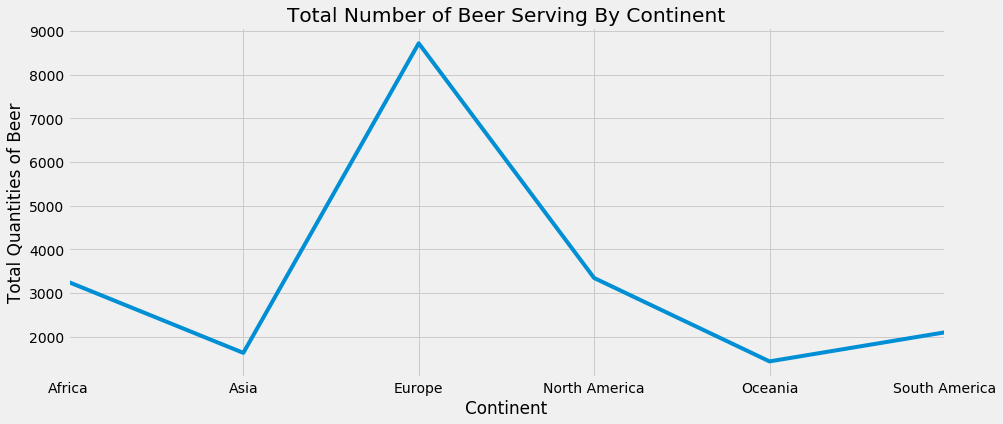

In [32]:
rcParams['figure.figsize'] = (14, 6)
plt.style.use('fivethirtyeight')

drinks.groupby('continent').beer_servings.sum().plot()
plt.title('Total Number of Beer Serving By Continent')
plt.xlabel('Continent')
plt.ylabel('Total Quantities of Beer')
plt.show()

In [33]:
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

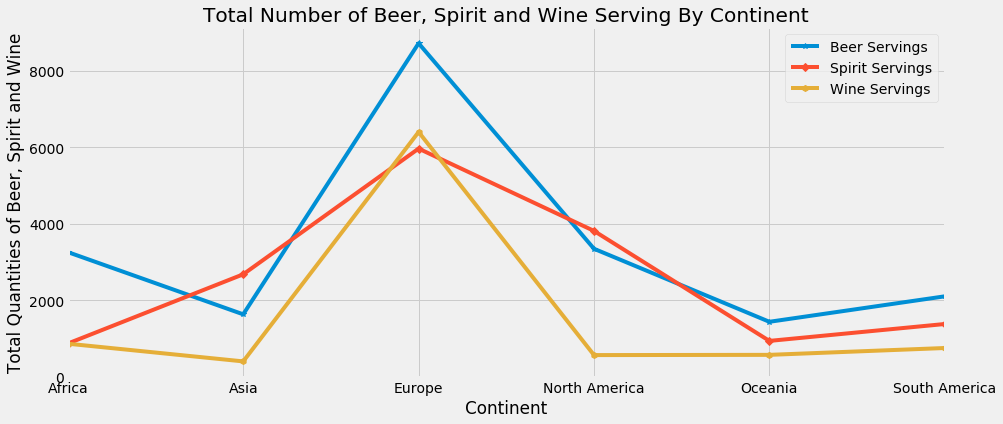

In [34]:

drinks.groupby('continent').beer_servings.sum().plot(label = 'Beer Servings', marker = '*')
drinks.groupby('continent').spirit_servings.sum().plot(label = 'Spirit Servings', marker = 'D')
drinks.groupby('continent').wine_servings.sum().plot(label = 'Wine Servings', marker = 'h')

plt.title('Total Number of Beer, Spirit and Wine Serving By Continent')
plt.xlabel('Continent')
plt.ylabel('Total Quantities of Beer, Spirit and Wine')
plt.legend()
plt.show()

###### We can use aggregate function for a specic column and visualize the data

In [35]:
test = drinks.groupby('continent').wine_servings.agg(['count', 'max', 'min', 'mean', 'sum'])
test

,count,max,min,mean,sum
continent,,,,,
Africa,53,233,0,16.264151,862
Asia,44,123,0,9.068182,399
Europe,45,370,0,142.222222,6400
North America,23,100,1,24.521739,564
Oceania,16,212,0,35.625000,570
South America,12,221,1,62.416667,749


In [37]:
drinks[drinks['continent'] == 'Asia'].wine_servings.agg(['count', 'max', 'min', 'mean', 'sum'])

count     44.000000
max      123.000000
min        0.000000
mean       9.068182
sum      399.000000
Name: wine_servings, dtype: float64

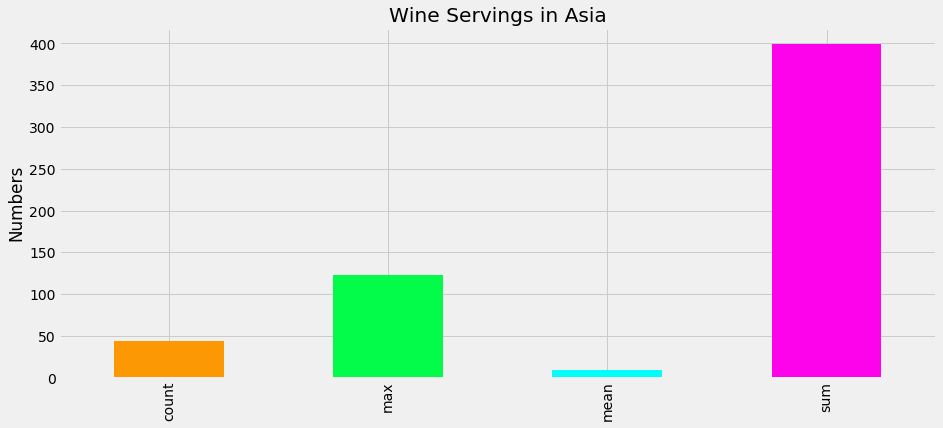

In [38]:
drinks[drinks['continent'] == 'Asia'].wine_servings.agg(['count', 'max', 'mean', 'sum']).plot(
    kind='bar', color = ['#fc9803', '#03fc4a', '#03fcfc', '#fc03eb'])

plt.title('Wine Servings in Asia')
plt.ylabel('Numbers')
plt.show()

###### Visualize the Average of All products by Continent

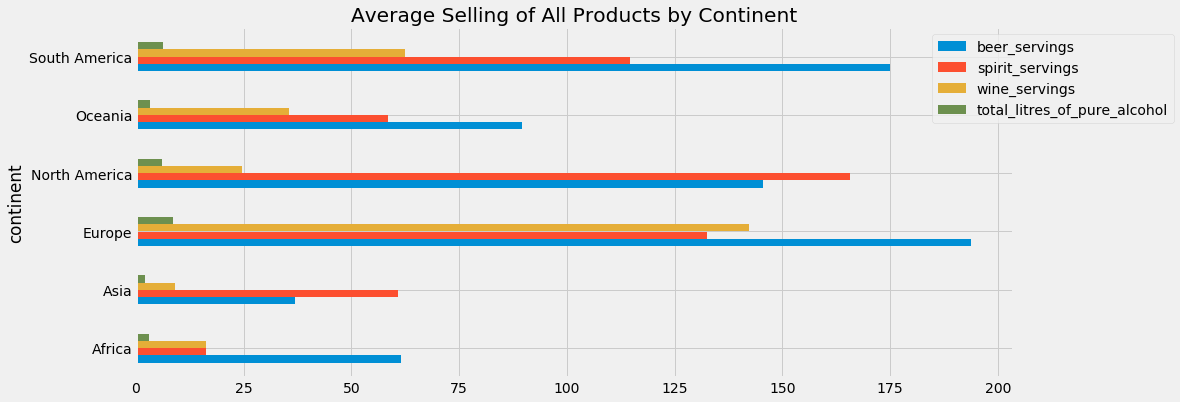

In [39]:
drinks.groupby('continent').mean().plot(kind = 'barh')

plt.title('Average Selling of All Products by Continent')
plt.legend(loc = 'best', bbox_to_anchor=(0.9, 1))
plt.show()

###### Comparison of Wine and Beer Servings

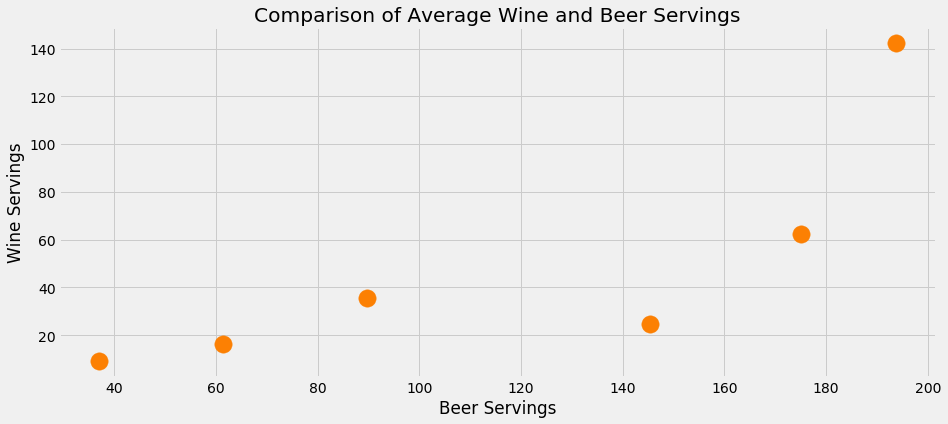

In [40]:
beer = drinks.groupby('continent').beer_servings.mean()
wine = drinks.groupby('continent').wine_servings.mean()

plt.scatter(x = beer, y = wine, color = '#fc8003', s = 300)
plt.title('Comparison of Average Wine and Beer Servings')
plt.xlabel('Beer Servings')
plt.ylabel('Wine Servings')
plt.show()

#### Finally

Groupby Split the data based on column(s)/condition(s) into groups.
Groupby Apply a function to all the groups and combine the results into an output.